# Assignment 16_Neural_Networks_ForestFires

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



sns.set_style('darkgrid')

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [3]:
forestfires = pd.read_csv("C:\\Users\\Raghavendra\\OneDrive\\Desktop\\assignment\\forestfires.csv")
forestfires.head()

month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0          small  
1         0          small  
2         0          small  
3         0          small  
4         0          small  

[5 rows x 31 columns]

In [4]:
forestfires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
numerical_feature = forestfires.describe(include=["int", "float"]).columns

print(list(numerical_feature))

['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep']


In [6]:
categorical_features = forestfires.describe(include=["object"]).columns

print(list(categorical_features))

['month', 'day', 'size_category']


Index(['month', 'day', 'size_category'], dtype='object')


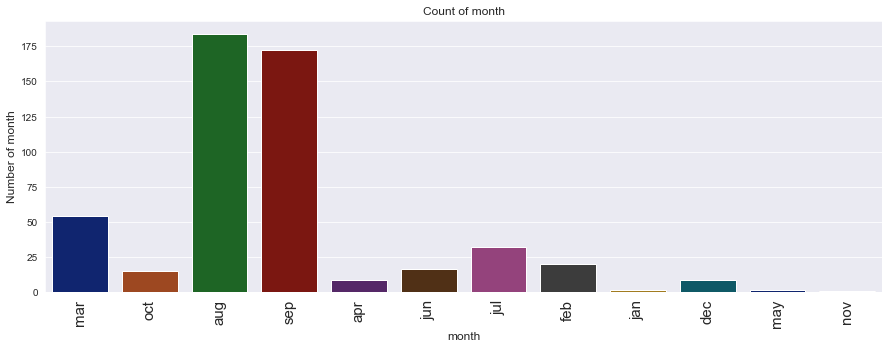

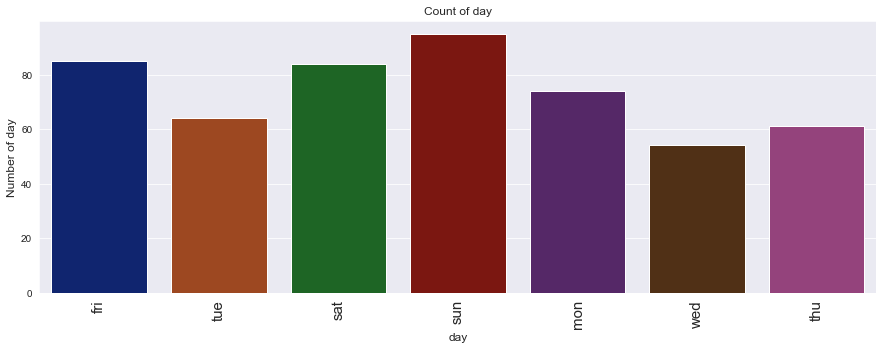

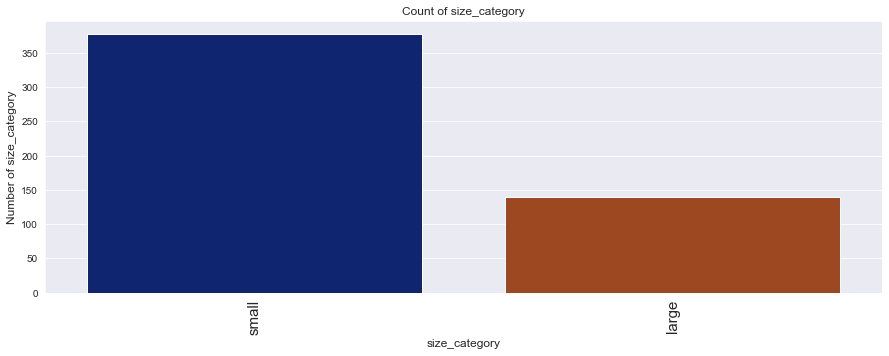

In [7]:
print(categorical_features)

for idx, column in enumerate(categorical_features):
    plt.figure(figsize=(15, 5))
    df = forestfires.copy()
    unique = df[column].value_counts(ascending=True);
    
    plt.title("Count of "+ column)
    sns.countplot(data=forestfires, x=column,palette = "dark")
    
    plt.xticks(rotation = 90, size = 15)
    
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Number of "+ column, fontsize=12)
    plt.show()

In [8]:
type_ = ['small', 'large']
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=forestfires['size_category'].value_counts(), name="size_category"))

fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Forestfires size category",
    annotations=[dict(text='size_category', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

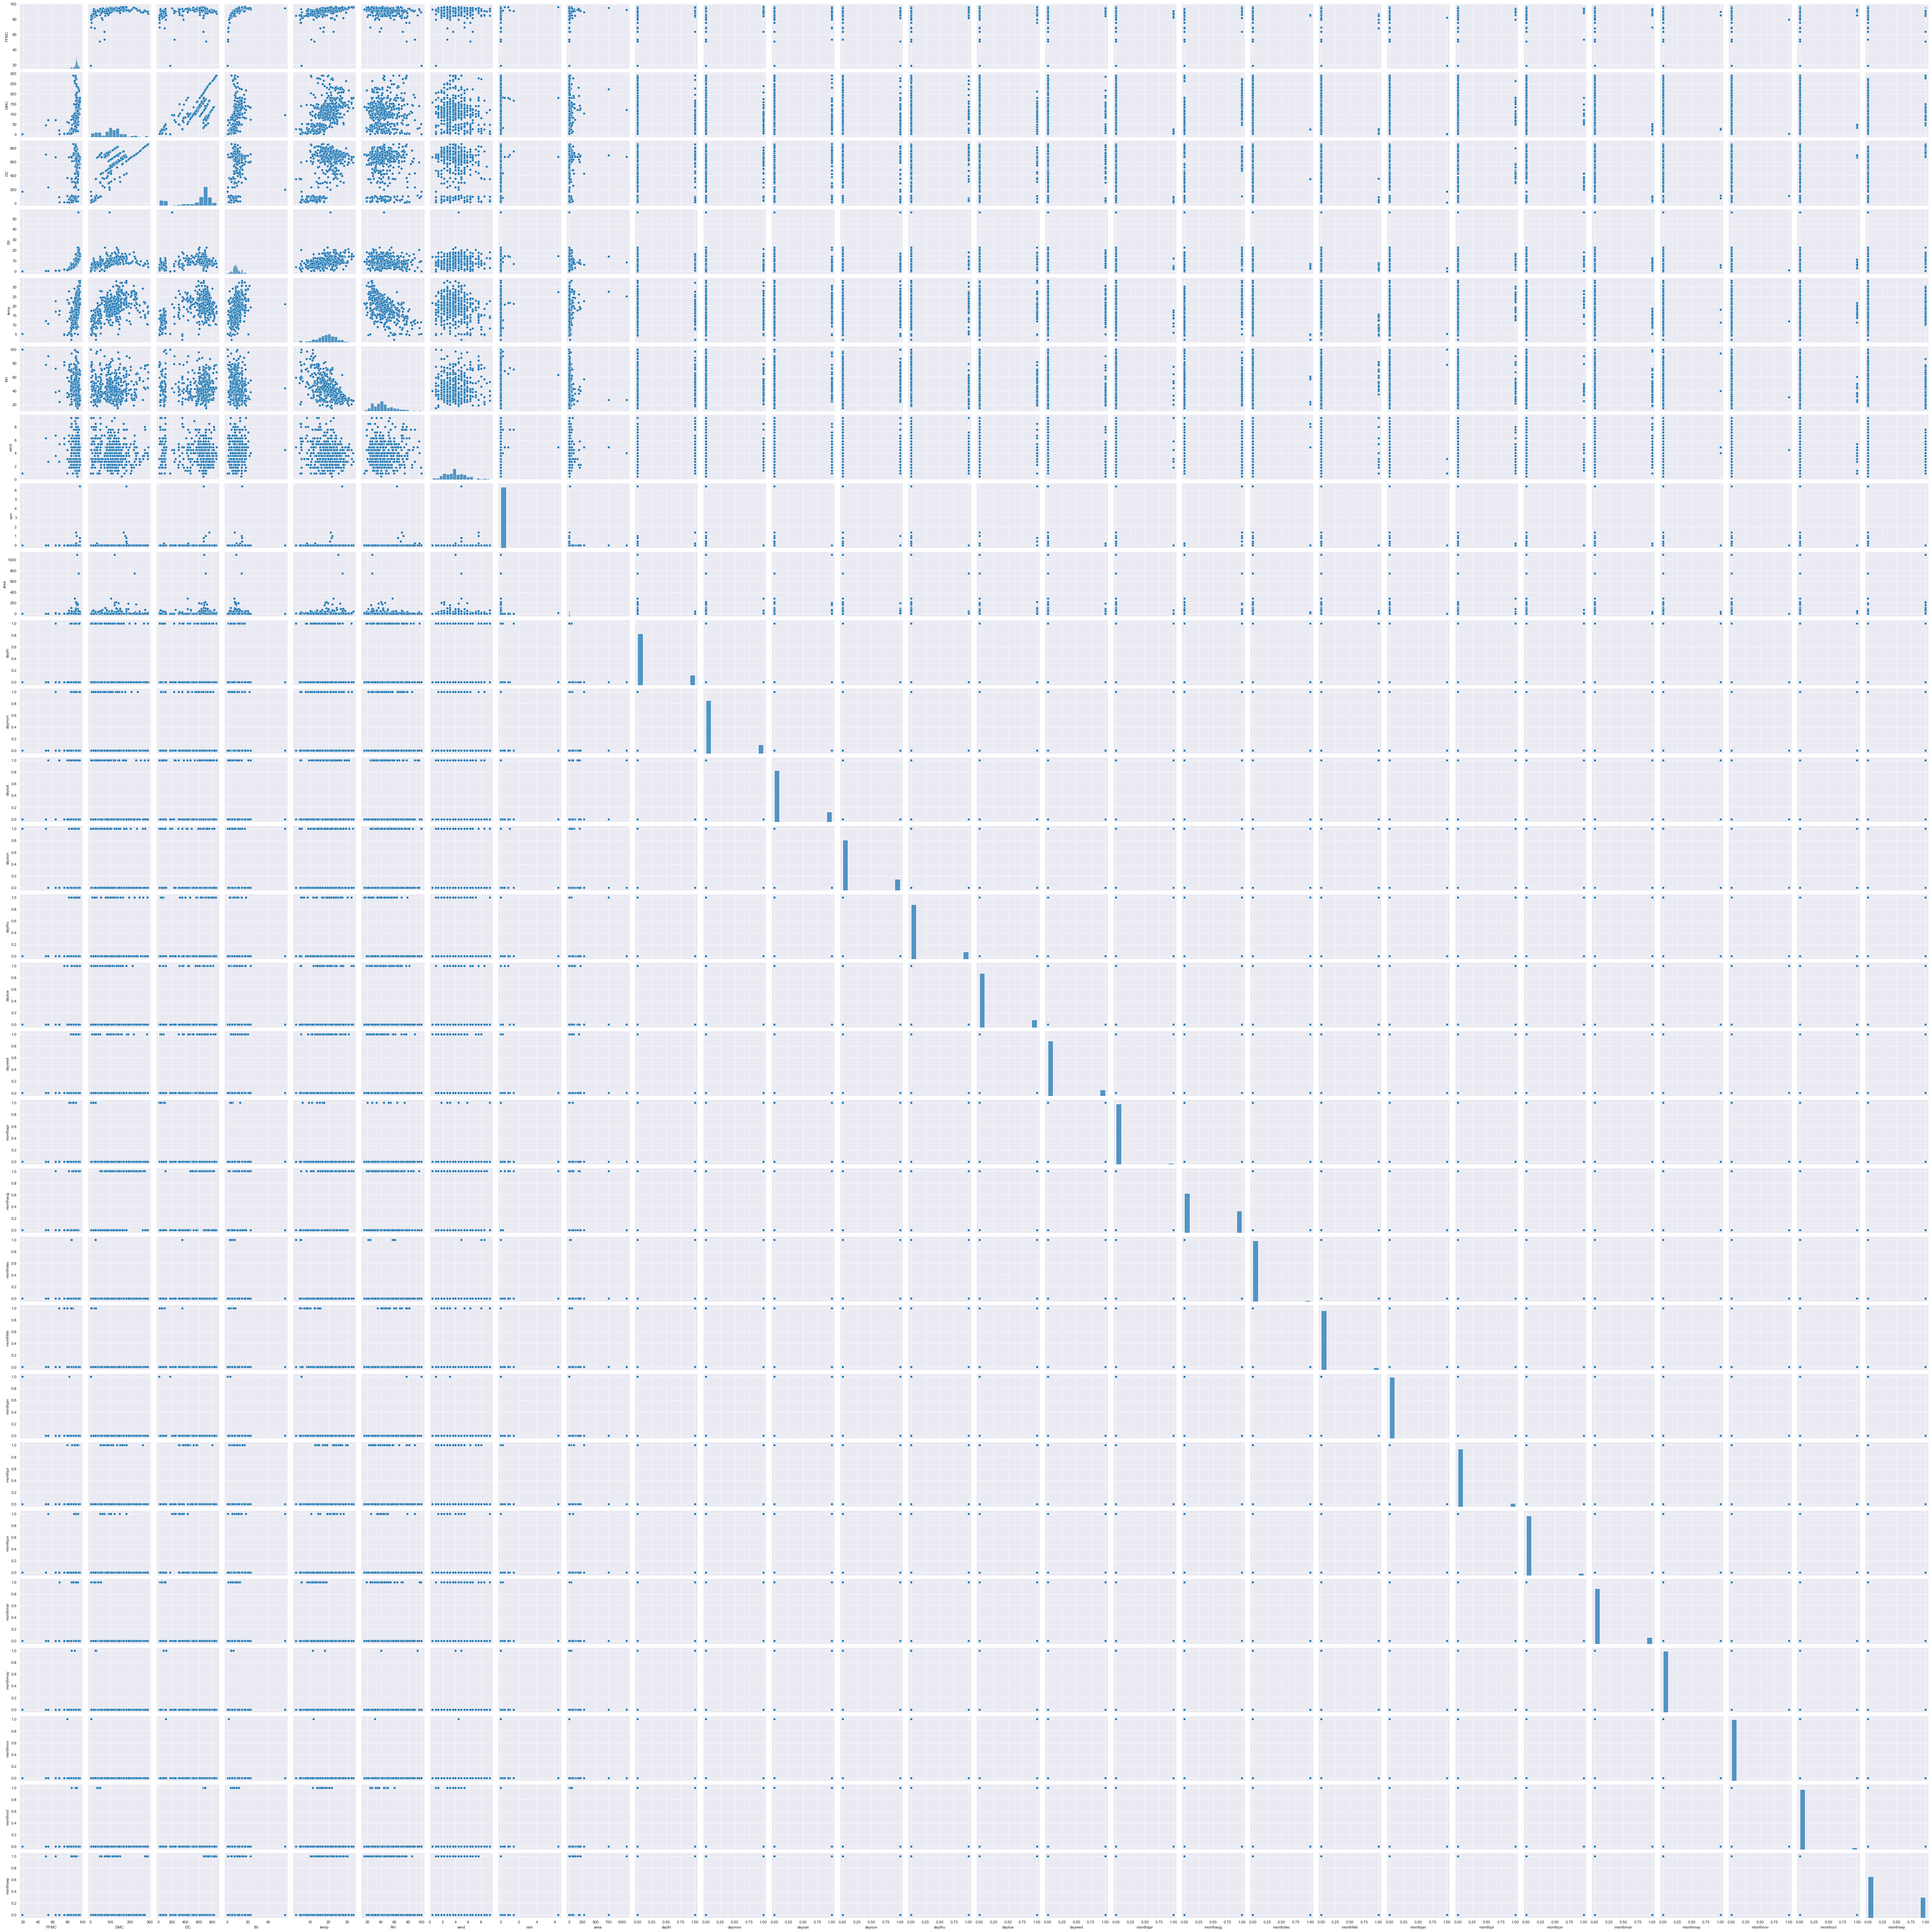

In [9]:
sns.set_style('darkgrid')
sns.pairplot(forestfires[numerical_feature])
plt.show()

In [10]:
forestfires['area_km'] = forestfires['area'] / 100

forestfires.head()

month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthjan  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  monthsep  \
0         0         0         1         0         0         0         0   
1         0         0         0         0         0         1         0   
2         0         0         0         0         0         1         0   
3         0         0         1         0         0         0         0   
4         0         0         1         0         0         0         0   

   size_category  area_km  
0          small      0.0  
1          small      0.0  
2          small      0.0  
3          small      0.0  
4          small      0.0  

[5 rows x 32 columns]

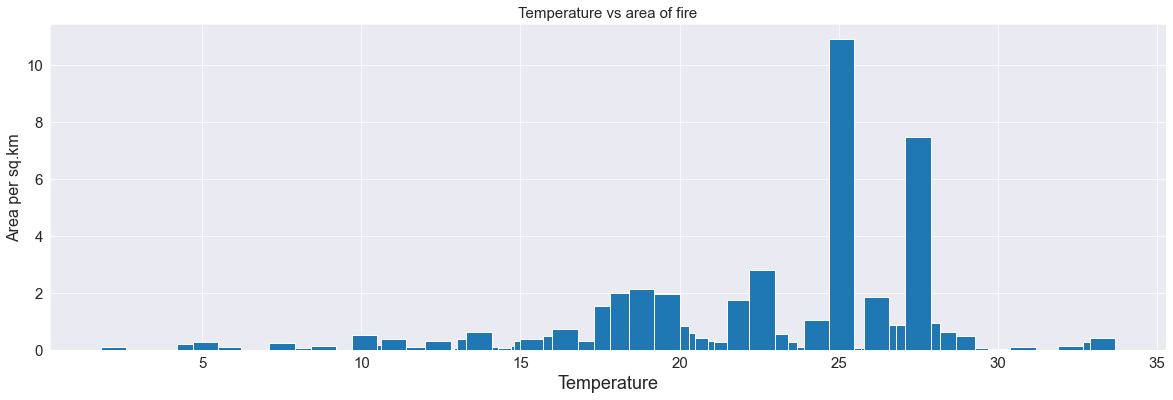

In [11]:
highest_fire_area = forestfires.sort_values(by="area_km", ascending=True)

plt.figure(figsize=(20, 6))

plt.title("Temperature vs area of fire" , fontsize=15)
plt.bar(highest_fire_area['temp'], highest_fire_area['area_km'])

plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel('Temperature',fontsize=18)
plt.ylabel('Area per sq.km', fontsize=16)
plt.show()

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda

In [13]:
forestfires.drop(["month","day"],axis=1,inplace = True)

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
data_copy= forestfires.copy()
le = LabelEncoder()

le_count = 0
for col in data_copy.columns[1:]:
    if data_copy[col].dtype == 'object':
        if len(list(data_copy[col].unique())) <= 2:
            le.fit(data_copy[col])
            data_copy[col] = le.transform(data_copy[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

1 columns were label encoded.


In [15]:
data_copy.size_category.unique()

array([1, 0])

Text(0.5, 1.0, 'Correlation with fire seze category \n')

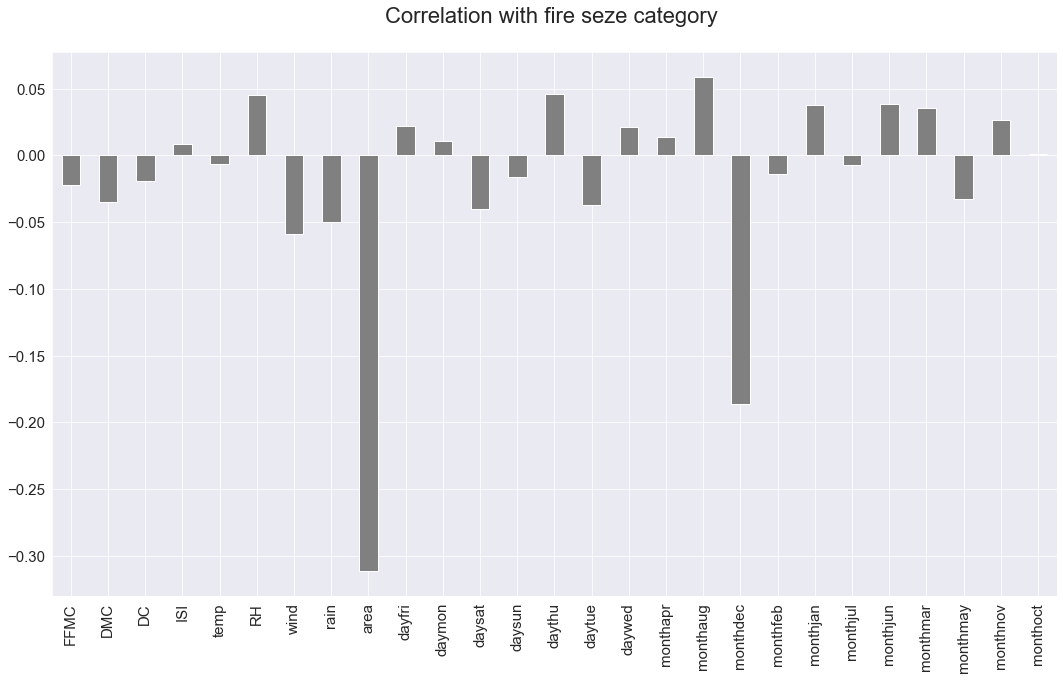

In [16]:
data2 = data_copy.iloc[:,:-3]

correlations = data2.corrwith(data_copy["size_category"])
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = 'grey',
        rot = 90, grid = True)
plt.title('Correlation with fire seze category \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

In [18]:
forestfires_ = pd.read_csv("C:\\Users\\Raghavendra\\OneDrive\\Desktop\\assignment\\forestfires.csv")
forestfires_.iloc[:,:-20].head()

month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0

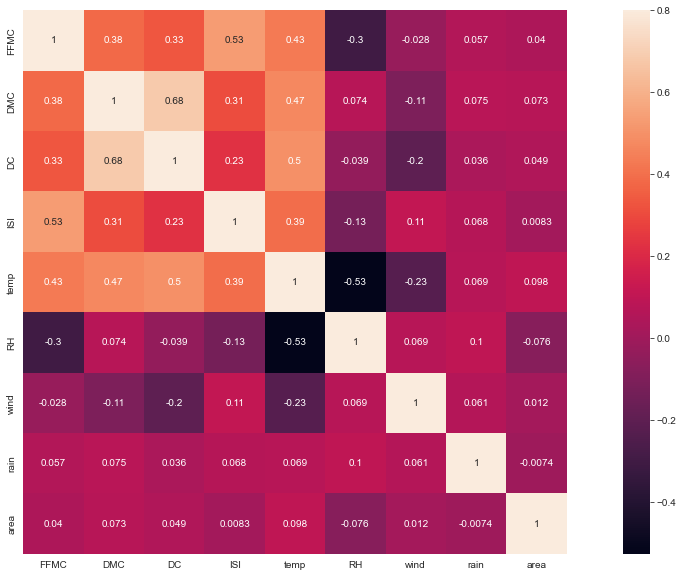

In [19]:
import seaborn as sns
import matplotlib.pyplot as pplt
corrmat = forestfires_.iloc[:,:-20].corr()
f, ax = pplt.subplots(figsize=(20, 10))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.constraints import maxnorm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold, RandomizedSearchCV
from keras.optimizers import Adam

In [21]:
col = data2.columns
col

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct'],
      dtype='object')

In [22]:
"""def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)"""


X = data_copy.iloc[:,0:28]
y = data_copy.iloc[:,28]

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.3,stratify = y)

In [24]:
print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (361, 28)
Shape of X_test:  (156, 28)
Shape of y_train:  (361,)
Shape of y_test:  (156,)


In [25]:
model = Sequential()
model.add(Dense(28, input_dim=28, kernel_initializer='uniform', activation='relu'))
model.add(Dense(50, kernel_initializer='uniform', activation='relu'))
model.add(Dense(50, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train,y_train, epochs=500, batch_size=10)

Epoch 1/500
37/37 [==============================] - 1s 2ms/step - loss: 0.6843 - accuracy: 0.7036
Epoch 2/500
37/37 [==============================] - 0s 3ms/step - loss: 0.6070 - accuracy: 0.7313
Epoch 3/500
37/37 [==============================] - 0s 2ms/step - loss: 0.5472 - accuracy: 0.7313
Epoch 4/500
37/37 [==============================] - 0s 2ms/step - loss: 0.5187 - accuracy: 0.7313
Epoch 5/500
37/37 [==============================] - 0s 2ms/step - loss: 0.5021 - accuracy: 0.7341
Epoch 6/500
37/37 [==============================] - 0s 2ms/step - loss: 0.4682 - accuracy: 0.7729
Epoch 7/500
37/37 [==============================] - 0s 1ms/step - loss: 0.4373 - accuracy: 0.7978
Epoch 8/500
37/37 [==============================] - 0s 2ms/step - loss: 0.3952 - accuracy: 0.8310
Epoch 9/500
37/37 [==============================] - 0s 2ms/step - loss: 0.3339 - accuracy: 0.8698
Epoch 10/500
37/37 [==============================] - 0s 2ms/step - loss: 0.2791 - accuracy: 0.9030
Epoch 11/

37/37 [==============================] - 0s 1ms/step - loss: 4.2515e-05 - accuracy: 1.0000
Epoch 161/500
37/37 [==============================] - 0s 1ms/step - loss: 4.2677e-05 - accuracy: 1.0000
Epoch 162/500
37/37 [==============================] - 0s 2ms/step - loss: 3.9796e-05 - accuracy: 1.0000
Epoch 163/500
37/37 [==============================] - 0s 2ms/step - loss: 3.9602e-05 - accuracy: 1.0000
Epoch 164/500
37/37 [==============================] - 0s 2ms/step - loss: 4.0763e-05 - accuracy: 1.0000
Epoch 165/500
37/37 [==============================] - 0s 2ms/step - loss: 3.6742e-05 - accuracy: 1.0000
Epoch 166/500
37/37 [==============================] - 0s 3ms/step - loss: 3.6151e-05 - accuracy: 1.0000
Epoch 167/500
37/37 [==============================] - 0s 2ms/step - loss: 3.4453e-05 - accuracy: 1.0000
Epoch 168/500
37/37 [==============================] - 0s 2ms/step - loss: 3.4661e-05 - accuracy: 1.0000
Epoch 169/500
37/37 [==============================] - 0s 2ms/step - 

37/37 [==============================] - 0s 2ms/step - loss: 2.1980e-04 - accuracy: 1.0000
Epoch 318/500
37/37 [==============================] - 0s 2ms/step - loss: 2.1220e-04 - accuracy: 1.0000
Epoch 319/500
37/37 [==============================] - 0s 2ms/step - loss: 2.0880e-04 - accuracy: 1.0000
Epoch 320/500
37/37 [==============================] - 0s 2ms/step - loss: 2.0132e-04 - accuracy: 1.0000
Epoch 321/500
37/37 [==============================] - 0s 2ms/step - loss: 2.0176e-04 - accuracy: 1.0000
Epoch 322/500
37/37 [==============================] - 0s 2ms/step - loss: 1.9690e-04 - accuracy: 1.0000
Epoch 323/500
37/37 [==============================] - 0s 2ms/step - loss: 1.9104e-04 - accuracy: 1.0000
Epoch 324/500
37/37 [==============================] - 0s 2ms/step - loss: 1.9049e-04 - accuracy: 1.0000
Epoch 325/500
37/37 [==============================] - 0s 2ms/step - loss: 1.8345e-04 - accuracy: 1.0000
Epoch 326/500
37/37 [==============================] - 0s 2ms/step - 

37/37 [==============================] - 0s 2ms/step - loss: 4.8636e-05 - accuracy: 1.0000
Epoch 474/500
37/37 [==============================] - 0s 1ms/step - loss: 4.7537e-05 - accuracy: 1.0000
Epoch 475/500
37/37 [==============================] - 0s 2ms/step - loss: 4.6393e-05 - accuracy: 1.0000
Epoch 476/500
37/37 [==============================] - 0s 2ms/step - loss: 4.5482e-05 - accuracy: 1.0000
Epoch 477/500
37/37 [==============================] - 0s 2ms/step - loss: 4.4118e-05 - accuracy: 1.0000
Epoch 478/500
37/37 [==============================] - 0s 3ms/step - loss: 4.2815e-05 - accuracy: 1.0000
Epoch 479/500
37/37 [==============================] - 0s 2ms/step - loss: 4.2095e-05 - accuracy: 1.0000
Epoch 480/500
37/37 [==============================] - 0s 2ms/step - loss: 4.1202e-05 - accuracy: 1.0000
Epoch 481/500
37/37 [==============================] - 0s 2ms/step - loss: 4.0497e-05 - accuracy: 1.0000
Epoch 482/500
37/37 [==============================] - 0s 2ms/step - 

In [26]:
def base_model(hidden_dim):
    model = Sequential()
    for i in range(1,len(hidden_dim)-1):
        if (i==1):
            model.add(Dense(hidden_dim[i],input_dim=hidden_dim[0],activation="relu"))
        else:
            model.add(Dense(hidden_dim[i],activation="relu"))
    model.add(Dense(hidden_dim[-1],kernel_initializer="normal",activation="sigmoid"))
    model.compile(loss="binary_crossentropy",optimizer = "rmsprop",metrics = ["accuracy"])
    return model  
  
model_ = base_model([28,50,50,1])
model_.fit(np.array(X_train),np.array(y_train),epochs=380)
pred_train = model_.predict(np.array(X_train))

Epoch 1/380
12/12 [==============================] - 3s 3ms/step - loss: 0.6605 - accuracy: 0.6814
Epoch 2/380
12/12 [==============================] - 0s 2ms/step - loss: 0.6135 - accuracy: 0.7313
Epoch 3/380
12/12 [==============================] - 0s 2ms/step - loss: 0.5895 - accuracy: 0.7313
Epoch 4/380
12/12 [==============================] - 0s 3ms/step - loss: 0.5736 - accuracy: 0.7313
Epoch 5/380
12/12 [==============================] - 0s 3ms/step - loss: 0.5624 - accuracy: 0.7313
Epoch 6/380
12/12 [==============================] - 0s 2ms/step - loss: 0.5517 - accuracy: 0.7341
Epoch 7/380
12/12 [==============================] - 0s 3ms/step - loss: 0.5415 - accuracy: 0.7368
Epoch 8/380
12/12 [==============================] - 0s 2ms/step - loss: 0.5305 - accuracy: 0.7479
Epoch 9/380
12/12 [==============================] - 0s 2ms/step - loss: 0.5196 - accuracy: 0.7507
Epoch 10/380
12/12 [==============================] - 0s 2ms/step - loss: 0.5094 - accuracy: 0.7507
Epoch 11/

12/12 [==============================] - 0s 2ms/step - loss: 3.0582e-04 - accuracy: 1.0000
Epoch 163/380
12/12 [==============================] - 0s 2ms/step - loss: 2.2871e-04 - accuracy: 1.0000
Epoch 164/380
12/12 [==============================] - 0s 2ms/step - loss: 2.5906e-04 - accuracy: 1.0000
Epoch 165/380
12/12 [==============================] - 0s 2ms/step - loss: 1.8229e-04 - accuracy: 1.0000
Epoch 166/380
12/12 [==============================] - 0s 2ms/step - loss: 1.7002e-04 - accuracy: 1.0000
Epoch 167/380
12/12 [==============================] - 0s 2ms/step - loss: 2.1161e-04 - accuracy: 1.0000
Epoch 168/380
12/12 [==============================] - 0s 2ms/step - loss: 1.4318e-04 - accuracy: 1.0000
Epoch 169/380
12/12 [==============================] - 0s 2ms/step - loss: 2.0265e-04 - accuracy: 1.0000
Epoch 170/380
12/12 [==============================] - 0s 2ms/step - loss: 1.8971e-04 - accuracy: 1.0000
Epoch 171/380
12/12 [==============================] - 0s 2ms/step - 

12/12 [==============================] - 0s 2ms/step - loss: 1.2319e-08 - accuracy: 1.0000
Epoch 319/380
12/12 [==============================] - 0s 2ms/step - loss: 1.3663e-08 - accuracy: 1.0000
Epoch 320/380
12/12 [==============================] - 0s 3ms/step - loss: 1.1911e-08 - accuracy: 1.0000
Epoch 321/380
12/12 [==============================] - 0s 2ms/step - loss: 1.3380e-08 - accuracy: 1.0000
Epoch 322/380
12/12 [==============================] - 0s 2ms/step - loss: 1.8280e-08 - accuracy: 1.0000
Epoch 323/380
12/12 [==============================] - 0s 2ms/step - loss: 1.2994e-08 - accuracy: 1.0000
Epoch 324/380
12/12 [==============================] - 0s 2ms/step - loss: 4.7594e-08 - accuracy: 1.0000
Epoch 325/380
12/12 [==============================] - 0s 2ms/step - loss: 1.0456e-06 - accuracy: 1.0000
Epoch 326/380
12/12 [==============================] - 0s 3ms/step - loss: 1.4809e-07 - accuracy: 1.0000
Epoch 327/380
12/12 [==============================] - 0s 2ms/step - 

In [27]:
model_.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 50)                1450      
                                                                 
 dense_5 (Dense)             (None, 50)                2550      
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 4,051
Trainable params: 4,051
Non-trainable params: 0
_________________________________________________________________


5/5 [==============================] - 0s 2ms/step


<AxesSubplot:>

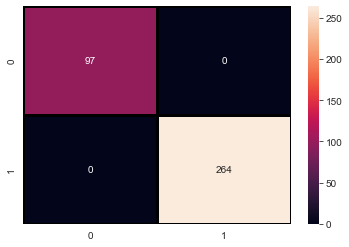

In [28]:
pred_test = model_.predict(np.array(X_test))
pred_test = pd.Series([i[0] for i in pred_test])
pred_train_ = pd.Series([i[0] for i in pred_train])

pred_y = []
pred_x = []
for i in pred_test:
    if i>0.5:
        pred_y.append(1)
    else:
        pred_y.append(0)
        
for i in pred_train_:
    if i>0.5:
        pred_x.append(1)
    else:
        pred_x.append(0)
        
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_train, pred_x),annot=True,fmt = "d",linecolor="k",linewidths=3)

In [29]:
scores = model_.evaluate(X_test, y_test)
print((model_.metrics_names[1]))

5/5 [==============================] - 0s 4ms/step - loss: 1.9858 - accuracy: 0.8846
accuracy


<AxesSubplot:>

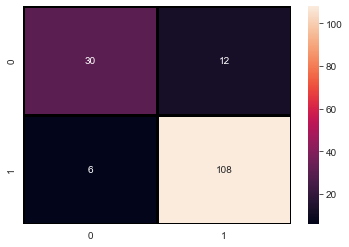

In [30]:
sns.heatmap(confusion_matrix(y_test, pred_y),annot=True,fmt = "d",linecolor="k",linewidths=3)

In [32]:
data = pd.read_csv("C:\\Users\\Raghavendra\\OneDrive\\Desktop\\assignment\\forestfires.csv")
data.drop(['dayfri', 'daymon', 'daysat', 'daysun', 'daythu','daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 
                  'monthfeb','monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov','monthoct','monthsep'],axis=1,inplace = True)

data.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),
                           (1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
data.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)
data.head()

month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  \
0      3    5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0   
1     10    2  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0   
2     10    6  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0   
3      3    5  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0   
4      3    7  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0   

  size_category  
0         small  
1         small  
2         small  
3         small  
4         small

In [33]:
data.size_category.replace(('small', 'large'), (0, 1), inplace = True)
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


scaled_features=scaler.fit_transform(data.drop('size_category',axis=1))
data_head=pd.DataFrame(scaled_features,columns=data.columns[:-1])
data_head

month       day      FFMC       DMC        DC       ISI      temp  \
0   -1.968443  0.357721 -0.805959 -1.323326 -1.830477 -0.860946 -1.842640   
1    1.110120 -1.090909 -0.008102 -1.179541  0.488891 -0.509688 -0.153278   
2    1.110120  0.840597 -0.008102 -1.049822  0.560715 -0.509688 -0.739383   
3   -1.968443  0.357721  0.191362 -1.212361 -1.898266 -0.004756 -1.825402   
4   -1.968443  1.323474 -0.243833 -0.931043 -1.798600  0.126966 -1.291012   
..        ...       ...       ...       ...       ...       ...       ...   
512  0.230531  1.323474 -1.640083 -0.846648  0.474768 -1.563460  1.536084   
513  0.230531  1.323474 -1.640083 -0.846648  0.474768 -1.563460  0.519019   
514  0.230531  1.323474 -1.640083 -0.846648  0.474768 -1.563460  0.398350   
515  0.230531  0.840597  0.680957  0.549003  0.269382  0.500176  1.156839   
516  1.549915 -1.090909 -2.020879 -1.685913 -1.780442 -1.739089 -1.222058   

           RH      wind      rain      area  
0    0.411724  1.498614 -0.073268 -0.202020  
1   -0.692456 -1.741756 -0.073268 -0.202020  
2   -0.692456 -1.518282 -0.073268 -0.202020  
3    3.233519 -0.009834  0.603155 -0.202020  
4    3.356206 -1.238940 -0.073268 -0.202020  
..        ...       ...       ...       ...  
512 -0.753800 -0.736124 -0.073268 -0.100753  
513  1.638592  0.995798 -0.073268  0.651674  
514  1.577248  1.498614 -0.073268 -0.026532  
515 -0.140366 -0.009834 -0.073268 -0.202020  
516 -0.815143  0.269509 -0.073268 -0.202020  

[517 rows x 11 columns]

In [34]:
x_train, x_test, y_train, y_test = train_test_split(data_head,data['size_category'], test_size=0.3, random_state=42)

In [35]:
data.head()

month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  \
0      3    5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0   
1     10    2  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0   
2     10    6  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0   
3      3    5  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0   
4      3    7  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0   

   size_category  
0              0  
1              0  
2              0  
3              0  
4              0

In [40]:
model_final = create_model_final(0.01,0.1,"tanh", "normal", 8,2)


model_final.fit(np.array(x_train),np.array(y_train),epochs=100)
pred_train = model_final.predict(np.array(x_train))

Epoch 1/100
12/12 [==============================] - 1s 2ms/step - loss: 0.6667 - accuracy: 0.7064
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 0.5807 - accuracy: 0.7368
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 0.5356 - accuracy: 0.7618
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4923 - accuracy: 0.7867
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4621 - accuracy: 0.8006
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4342 - accuracy: 0.8283
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3661 - accuracy: 0.8615
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3134 - accuracy: 0.8753
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 0.2781 - accuracy: 0.9058
Epoch 10/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2351 - accuracy: 0.9197
Epoch 11/

12/12 [==============================] - 0s 1ms/step - loss: 0.0361 - accuracy: 0.9861
Epoch 84/100
12/12 [==============================] - 0s 1ms/step - loss: 0.0337 - accuracy: 0.9861
Epoch 85/100
12/12 [==============================] - 0s 1ms/step - loss: 0.0300 - accuracy: 0.9889
Epoch 86/100
12/12 [==============================] - 0s 1ms/step - loss: 0.0273 - accuracy: 0.9917
Epoch 87/100
12/12 [==============================] - 0s 1ms/step - loss: 0.0342 - accuracy: 0.9834
Epoch 88/100
12/12 [==============================] - 0s 1ms/step - loss: 0.0328 - accuracy: 0.9889
Epoch 89/100
12/12 [==============================] - 0s 1ms/step - loss: 0.0313 - accuracy: 0.9861
Epoch 90/100
12/12 [==============================] - 0s 1ms/step - loss: 0.0345 - accuracy: 0.9917
Epoch 91/100
12/12 [==============================] - 0s 1ms/step - loss: 0.0359 - accuracy: 0.9889
Epoch 92/100
12/12 [==============================] - 0s 1ms/step - loss: 0.0399 - accuracy: 0.9861
Epoch 93/100


In [42]:
scores_ = model_final.evaluate(x_test, y_test)
print((model_final.metrics_names[1]))

5/5 [==============================] - 0s 3ms/step - loss: 0.0401 - accuracy: 0.9872
accuracy


5/5 [==============================] - 0s 1ms/step


<AxesSubplot:>

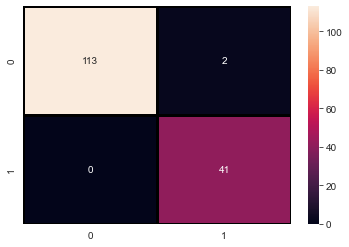

In [43]:
pred_final = model_final.predict(x_test)

pred_final = pd.Series([i[0] for i in pred_final])


pred_NN = []

        
for i in pred_final:
    if i>0.5:
        pred_NN.append(1)
    else:
        pred_NN.append(0)

from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, pred_NN),annot=True,fmt = "d",linecolor="k",linewidths=3)

In [44]:
from sklearn.metrics import  accuracy_score
accuracy_final = accuracy_score(y_test,pred_NN)
accuracy_final

0.9871794871794872

In [45]:
import pickle

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.python.keras.layers import deserialize, serialize
from tensorflow.python.keras.saving import saving_utils


def unpack(model, training_config, weights):
    restored_model = deserialize(model)
    if training_config is not None:
        restored_model.compile(
            **saving_utils.compile_args_from_training_config(
                training_config
            )
        )
    restored_model.set_weights(weights)
    return restored_model

def make_keras_picklable():

    def __reduce__(self):
        model_metadata = saving_utils.model_metadata(self)
        training_config = model_metadata.get("training_config", None)
        model = serialize(self)
        weights = self.get_weights()
        return (unpack, (model, training_config, weights))

    cls = Model
    cls.__reduce__ = __reduce__

make_keras_picklable()

In [46]:
import pickle
with open('model_forestfires_nn.pkl', 'wb') as file:
      pickle.dump(model_final, file)

In [47]:
filename = "model_forestfires_nn.pkl"
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.evaluate(x_test, y_test)
print(result)

5/5 [==============================] - 3s 2ms/step - loss: 0.0401 - accuracy: 0.9872
[0.040059223771095276, 0.9871794581413269]
